<a href="https://colab.research.google.com/github/Trung0Minh/AIO2023-MODULE-2/blob/main/depth_information_reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [2]:
def l1_distance(x, y):
    return abs(x - y)

def l2_distance(x, y):
    return (x - y) ** 2

In [3]:
def pixel_wise_matching(left_img_path, right_img_path, disparity_range, compute_type: str, save_result=True):
    left = cv2.imread(left_img_path, 0)
    right = cv2.imread(right_img_path, 0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]
    depth = np.zeros((height, width), np.uint8)

    max_cost = 255 if compute_type == 'l1' else np.power(255, 2)

    for y in range(height):
        for x in range(width):
            disparty = 0
            cost_min = np.Inf

            for d in range(disparity_range):
                if x - d < 0:
                    cost = max_cost
                else:
                    if compute_type == 'l1':
                        cost = l1_distance(left[y, x], right[y, x - d])
                    else:
                        cost = l2_distance(left[y, x], right[y, x - d])

                if cost < cost_min:
                    cost_min = cost
                    disparity = d

            depth[y, x] = disparity * (255 / disparity_range)

    if save_result:
        cv2.imwrite('depth.png', depth)

    return depth

array([[[128,   0,   0],
        [188,   0,   0],
        [252,   0,   0],
        ...,
        [255,  60,   0],
        [  0, 128, 255],
        [  0,  64, 255]],

       [[128,   0,   0],
        [188,   0,   0],
        [252,   0,   0],
        ...,
        [  0,   0, 192],
        [  0,   0, 192],
        [  0,   0, 192]],

       [[128,   0,   0],
        [188,   0,   0],
        [252,   0,   0],
        ...,
        [  0,  64, 255],
        [  0,   0, 255],
        [  0,   0, 192]],

       ...,

       [[128,   0,   0],
        [128,   0,   0],
        [128,   0,   0],
        ...,
        [  0,   0, 192],
        [  0,   0, 255],
        [  0,   0, 192]],

       [[128,   0,   0],
        [188,   0,   0],
        [128,   0,   0],
        ...,
        [  0,  64, 255],
        [  0,   0, 255],
        [  0,   0, 192]],

       [[128,   0,   0],
        [128,   0,   0],
        [252,   0,   0],
        ...,
        [194, 255,  62],
        [130, 255, 126],
        [ 66, 255, 190]]], dtype=uint8)
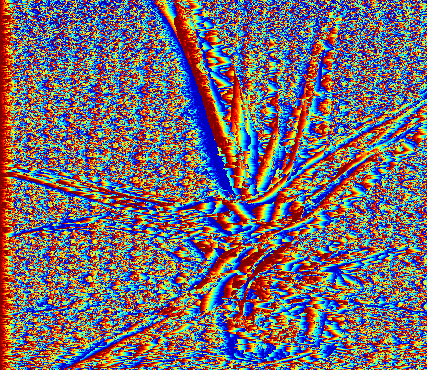

In [4]:
left_img_path = 'Aloe_left_1.png'
right_img_path = 'Aloe_right_1.png'
disparity_range = 16

pixel_wise_result = pixel_wise_matching ( left_img_path , right_img_path , disparity_range
, compute_type ='l1', save_result = True )

cv2.applyColorMap(pixel_wise_result, cv2.COLORMAP_JET)

In [38]:
def window_based_matching(left_img_path,
                          right_img_path,
                          disparity_range,
                          compute_type: str,
                          kernel_size,
                          save_result=True):
    left = cv2.imread(left_img_path, 0)
    right = cv2.imread(right_img_path, 0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]
    depth = np.zeros((height, width), np.uint8)

    kernel_half = (kernel_size - 1) // 2

    max_cost = 255 if compute_type == 'l1' else np.power(255, 2)

    for y in range(kernel_half, height - kernel_half):
        for x in range(kernel_half, width - kernel_half):
            disparty = 0
            cost_min = np.Inf

            for d in range(disparity_range):
                if x - kernel_half - d < 0 or x + kernel_half + 1 - d > width:
                    cost = max_cost
                else:
                    if compute_type == 'l1':
                        cost = np.sum(l1_distance(left[y - kernel_half:y + kernel_half + 1, x - kernel_half:x + kernel_half + 1],
                                                  right[y - kernel_half:y + kernel_half + 1, x - kernel_half:x + kernel_half + 1]))
                    else:
                        cost = np.sum(l2_distance(left[y - kernel_half:y + kernel_half + 1, x - kernel_half:x + kernel_half + 1],
                                                  right[y - kernel_half:y + kernel_half + 1, x - kernel_half - d:x + kernel_half + 1 - d]))

                if cost < cost_min:
                    cost_min = cost
                    disparity = d

            depth[y, x] = disparity * (255 / disparity_range)

    if save_result:
        cv2.imwrite('depth_window_based.png', depth)

    return depth

In [39]:
left_img_path = 'Aloe_left_1.png'
right_img_path = 'Aloe_right_2.png'
disparity_range = 64
kernel_size = 5

window_based_result = window_based_matching (left_img_path, right_img_path, disparity_range,
                                             compute_type ='l2', kernel_size = kernel_size , save_result = True )

In [33]:
left = cv2.imread(left_img_path, 0)
right = cv2.imread(right_img_path, 0)

left.shape, right.shape

((370, 427), (370, 427))

array([[[128,   0,   0],
        [128,   0,   0],
        [128,   0,   0],
        ...,
        [128,   0,   0],
        [128,   0,   0],
        [128,   0,   0]],

       [[128,   0,   0],
        [128,   0,   0],
        [128,   0,   0],
        ...,
        [128,   0,   0],
        [128,   0,   0],
        [128,   0,   0]],

       [[128,   0,   0],
        [128,   0,   0],
        [140,   0,   0],
        ...,
        [255, 140,   0],
        [128,   0,   0],
        [128,   0,   0]],

       ...,

       [[128,   0,   0],
        [128,   0,   0],
        [140,   0,   0],
        ...,
        [  0,   0, 144],
        [128,   0,   0],
        [128,   0,   0]],

       [[128,   0,   0],
        [128,   0,   0],
        [128,   0,   0],
        ...,
        [128,   0,   0],
        [128,   0,   0],
        [128,   0,   0]],

       [[128,   0,   0],
        [128,   0,   0],
        [128,   0,   0],
        ...,
        [128,   0,   0],
        [128,   0,   0],
        [128,   0,   0]]], dtype=uint8)
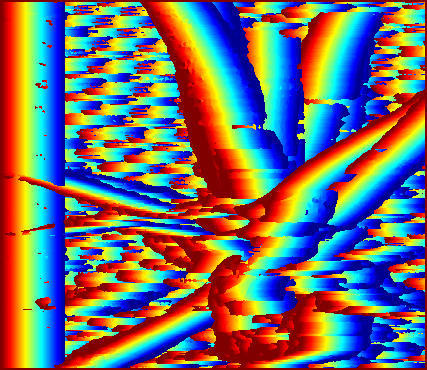

In [40]:
cv2.applyColorMap(window_based_result, cv2.COLORMAP_JET)

In [12]:
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

In [49]:
def window_based_matching_cosine(left_img_path,
                                right_img_path,
                                disparity_range,
                                kernel_size,
                                save_result=True):
    left = cv2.imread(left_img_path, 0)
    right = cv2.imread(right_img_path, 0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]
    depth = np.zeros((height, width), np.uint8)

    kernel_half = (kernel_size - 1) // 2

    for y in range(kernel_half, height - kernel_half):
        for x in range(kernel_half, width - kernel_half):
            disparity = 0
            cost_optimal = -1

            for d in range(disparity_range):
                cost = -1
                if x - kernel_half - d > 0:
                    cost = cosine_similarity(left[y - kernel_half:y + kernel_half + 1, x - kernel_half:x + kernel_half + 1].flatten(),
                                                  right[y - kernel_half:y + kernel_half + 1, x - kernel_half - d:x + kernel_half + 1 - d].flatten())

                if cost > cost_optimal:
                    cost_optimal = cost
                    disparity = d

            depth[y, x] = disparity * 10

    if save_result:
        cv2.imwrite('depth_window_based_cosine.png', depth)

    return depth

In [50]:
left_img_path = 'Aloe_left_1.png'
right_img_path = 'Aloe_right_1.png'
disparity_range = 64
kernel_size = 5

window_based_cosine_result = window_based_matching_cosine (left_img_path, right_img_path, disparity_range,
                                                    kernel_size = kernel_size , save_result = True )

<ipython-input-49-112e43b3ea0a>:32: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 390 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  depth[y, x] = disparity * 10
<ipython-input-49-112e43b3ea0a>:32: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 510 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  depth[y, x] = disparity * 10
<ipython-input-49-112e43b3ea0a>:32: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 620 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast ov

array([[[128,   0,   0],
        [128,   0,   0],
        [128,   0,   0],
        ...,
        [128,   0,   0],
        [128,   0,   0],
        [128,   0,   0]],

       [[128,   0,   0],
        [128,   0,   0],
        [128,   0,   0],
        ...,
        [128,   0,   0],
        [128,   0,   0],
        [128,   0,   0]],

       [[128,   0,   0],
        [128,   0,   0],
        [128,   0,   0],
        ...,
        [  0, 252, 255],
        [128,   0,   0],
        [128,   0,   0]],

       ...,

       [[128,   0,   0],
        [128,   0,   0],
        [128,   0,   0],
        ...,
        [  0, 236, 255],
        [128,   0,   0],
        [128,   0,   0]],

       [[128,   0,   0],
        [128,   0,   0],
        [128,   0,   0],
        ...,
        [128,   0,   0],
        [128,   0,   0],
        [128,   0,   0]],

       [[128,   0,   0],
        [128,   0,   0],
        [128,   0,   0],
        ...,
        [128,   0,   0],
        [128,   0,   0],
        [128,   0,   0]]], dtype=uint8)
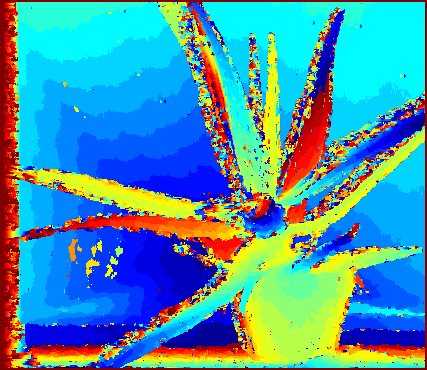

In [51]:
cv2.applyColorMap(window_based_cosine_result, cv2.COLORMAP_JET)